# Car Price Predictor(Car Dekho) Krish Naik

# About this dataset

This dataset contains information about used cars listed on different websites
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

The columns in the given dataset is as follows:

- Car_Name
- Year: This column should be filled with the year in which the car was bought.
- Selling_Price : This column should be filled with the price the owner wants to sell the car at.
- Present_Price: This is the current ex-showroom price of the car.
- Kms_Driven: This is the distance completed by the car in km.
- Fuel_Type: Fuel type of the car.
- Seller_Type: Defines whether the seller is a dealer or an individual.
- Transmission: Defines whether the car is manual or automatic.
- Owner: Defines the number of owners the car has previously had.
- Car_Name: This column should be filled with the name of the car.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\akshat.agrawal\Desktop\akshat_agrawal_googledrivebackup\Machine Learning\Data\car data.csv")


In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

- car price is given in lakhs, we can convert them by multiplying with 100000 but again after Scaling we need to bring all of them on a single socre

# Data Preprocessing

# Categorical columns
- car_name
- Fuel_type
- Seller Type
- Transmission
- Owner

# let's find unique values in each categorical column

In [6]:
df['Car_Name'].unique()

# car name has too many unique values

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [7]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [8]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [9]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [10]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

# Null Values

In [11]:
df.isnull().sum() # no  null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
from datetime import datetime

currentYear = datetime.now().year
df['Current Year'] = currentYear

df['Years Old'] = df['Current Year'] - df['Year']
df.drop(columns=['Year','Current Year'], inplace=True)

In [14]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years Old
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


<AxesSubplot:>

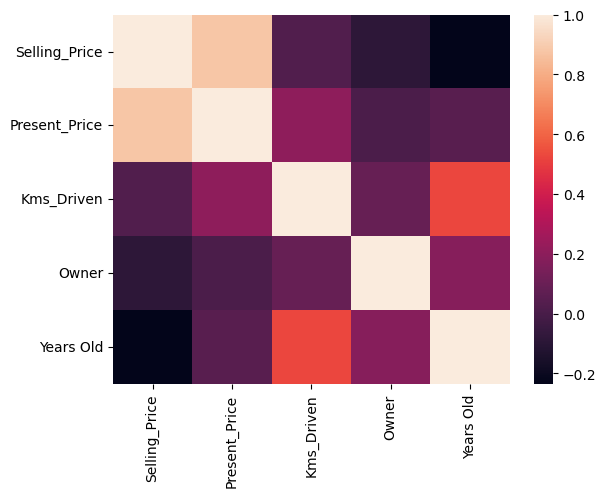

In [15]:
import seaborn as sns
sns.heatmap(df.corr())
#sns.pairplot(df.corr())

- sellin_price and present_price have good +ve correlation and also kms_driven and years_old

In [16]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Years Old,-0.236141,0.047584,0.524342,0.182104,1.000000


In [17]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years Old
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


# MODEL BUILDING

In [18]:
df.head(2)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years Old
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score

In [20]:
x = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [22]:
print(x_train.shape , x_test.shape,y_train.shape, y_test.shape)

(225, 8) (76, 8) (225,) (76,)


In [23]:
colum_trans = make_column_transformer((OneHotEncoder(sparse = False,handle_unknown='ignore'),['Car_Name','Fuel_Type','Seller_Type','Transmission']) , 
                                      remainder='passthrough')
# apply OneHotEncoder on cateegorical columns
# sparse = False
# remainder='passthrough' means to pass rest columns as it is

scaler = StandardScaler()

# Linear Regression

In [24]:
lr = LinearRegression(normalize = True)

pipe = make_pipeline(colum_trans, scaler, lr)
# data in pipeline will first go through column_trans then scaled then fit Linear regression


pipe.fit(x_train, y_train)

y_predict_lr = pipe.predict(x_test)

r2_score(y_test, y_predict_lr)

# In practice, R2 will be negative whenever your model's predictions are worse than a constant function that always predicts
# the mean of the data.

C:\Users\akshat.agrawal\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


-2.683321537043339e+21

# Ridge Regression

In [25]:
ridge = Ridge()
pipe = make_pipeline(colum_trans, scaler, ridge)
pipe.fit(x_train, y_train)

y_predict_ridge = pipe.predict(x_test)

r2_score(y_test, y_predict_ridge)

0.9095535979429077

# The closer the r-squared value is to 1, the better the fit. An r-squared value of 0 indicates that the regression line does not fit the data at all.

# Lasso Regression

In [26]:
lasso = Lasso()
pipe = make_pipeline(colum_trans, scaler, lasso)
pipe.fit(x_train, y_train)

y_predict_lasso = pipe.predict(x_test)

r2_score(y_test, y_predict_lasso)

0.6705374422662087

# In this particular dataset, Ridge regression shows the best fit with r2 score close to 1

# Applyinng Linear Regression after One Hot Encoding, Without Scaling

In [27]:
df.head(2)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years Old
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10


In [28]:
x1 = df.drop(columns=['Selling_Price'])
y1 = df['Selling_Price']

In [29]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.25,random_state=0)

In [30]:
colum_trans = make_column_transformer((OneHotEncoder(sparse = False,handle_unknown='ignore'),['Car_Name','Fuel_Type','Seller_Type','Transmission']) , 
                                      remainder='passthrough')
# apply OneHotEncoder on cateegorical columns
# sparse = False
# remainder='passthrough' means to pass rest columns as it is

# scaler = StandardScaler()

In [31]:
lr = LinearRegression(normalize = True)

pipe = make_pipeline(colum_trans, lr)
# data in pipeline will first go through column_trans then scaled then fit Linear regression


pipe.fit(x1_train, y1_train)

y1_predict_lr = pipe.predict(x1_test)

r2_score(y1_test, y1_predict_lr)

C:\Users\akshat.agrawal\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


-2.1796387752012633e+22

# Applyinng Ridge Regression after One Hot Encoding, Without Scaling

In [32]:
colum_trans = make_column_transformer((OneHotEncoder(sparse = False,handle_unknown='ignore'),['Car_Name','Fuel_Type','Seller_Type','Transmission']) , 
                                      remainder='passthrough')
ridge = Ridge()
pipe = make_pipeline(colum_trans, ridge)
pipe.fit(x1_train, y1_train)

y1_predict_ridge = pipe.predict(x1_test)

r2_score(y1_test, y1_predict_ridge)

0.9046710935350879

# We see that even without applying Scaling, there is not much difference in this case

# Krish Naik Video

In [33]:
df.head(2)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years Old
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10


In [34]:
new_df = df.drop(columns = 'Car_Name')

In [35]:
encoded_df = pd.get_dummies(new_df, drop_first=True)
encoded_df.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1


In [36]:
encoded_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [37]:
x2 = encoded_df.iloc[: , 1:]
y2 = encoded_df.iloc[: , 0]

In [38]:
x2.head()

,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


# Feature Importance

from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()
etr.fit(x2,y2)

print(etr.feature_importances_)

# we can see the importance of individual columns of dependent features i.e. "x"  here

# plotting 5 most important features

feat_importance = pd.Series(etr.feature_importances_ , index =x2.columns )
feat_importance.nlargest(5).plot(kind = 'barh', figsize=(6,3))

# we see that present price is most imp feature here, then fuel_type_diesel and so on, which makes an impact on dependent feature

# this concept might be used to drop some features when we have too many fatures

from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.20, random_state=24)

# We are using Random Forest Regressor here, so we don't need Scaling here as it uses decision trees

n_estimator = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# print(n_estimator)

max_feature= ['auto','sqrt']
max_depth =  [int(x) for x in np.linspace(start=5, stop=30, num=6)]
min_sample_splits = [2,5,10,15,100]
min_sample_leaf = [1,2,5,10]

from sklearn.model_selection import RandomizedSearchCV

# RandomizedSearchCV is faster than GridSearchCV
random_grid = {'n_estimators' : n_estimator,
               'max_features' : max_feature,
               'max_depth'    : max_depth,
               'min_samples_split': min_sample_splits,
               'min_samples_leaf' : min_sample_leaf
}

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5,
                       verbose=2, random_state=43)

rf_random.fit(x_train, y_train)

In [39]:
X = encoded_df.iloc[: , 1:]
Y = encoded_df.iloc[: , 0]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)
[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
from sklearn.model_selection import RandomizedSearchCV
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)
{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,Y_train)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, mi

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [40]:
print(rf_random.best_params_)

{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25}


In [41]:
predictions = rf_random.predict(X_test)
predictions

array([ 7.2055 ,  0.55354,  5.04285,  9.14316, 16.50309,  4.96137,
        3.44035,  0.77607,  4.6074 ,  4.52355,  3.12721,  0.87539,
        4.9647 ,  7.97801,  7.93498, 10.5055 ,  7.33113,  4.06695,
        0.47802,  1.4681 ,  3.97564,  4.58924,  5.49435,  9.36851,
        0.25007,  0.75926,  0.52688,  0.64324,  0.50568,  4.73677,
        5.28422,  5.79855,  0.50957,  8.79644,  3.4149 ,  1.20958,
        5.65915,  7.24123,  0.23495,  9.10863,  9.37728, 19.3667 ,
        4.82785,  4.095  ,  5.4173 , 11.75249,  0.30222,  0.90951,
        4.9663 ,  8.16639,  7.48396,  3.54579,  4.72625, 20.89905,
        1.09399,  1.04072,  0.51177,  2.7414 ,  3.64885,  1.236  ,
        3.84445,  8.84685,  3.24882, 20.90861,  4.20155,  5.58797,
       10.30408,  4.83145,  0.5289 ,  2.95202,  3.34929,  3.0614 ,
        0.68412,  5.431  ,  0.92632,  2.90263,  0.5189 ,  9.02139,
        1.14948,  2.7601 ,  0.50125,  9.97873,  7.27137,  5.44707,
        5.09565,  0.93976,  6.20277,  5.99973,  0.45755,  4.94

C:\Users\akshat.agrawal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

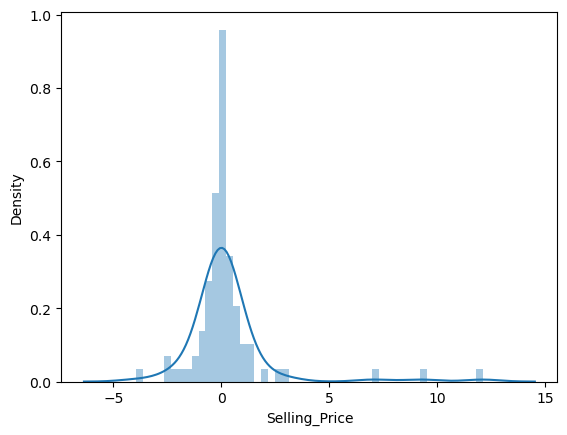

In [42]:
sns.distplot(Y_test-predictions) # difference between actual Y_test and Predicted values
# we see maxm=imum values have difference 0, means good prediction

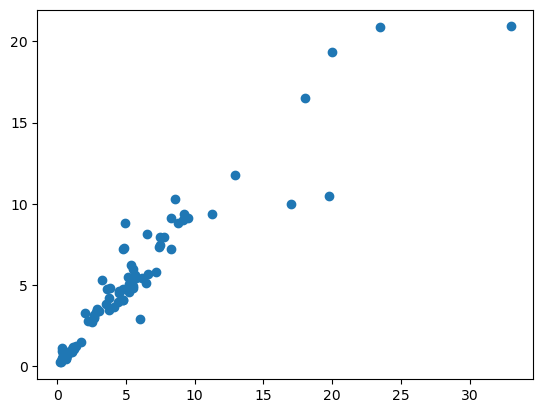

In [43]:
plt.scatter(Y_test, predictions)

# linear plotting - means good prediction is there

In [44]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 0.8885370329670349
MSE: 3.970625783038464
RMSE: 1.9926429140813122
